In [ ]:
import pandas as pd
df = pd.read_csv('/content/Unemployment in India.csv')
print(df.head())
df.info()

           Region         Date  Frequency   Estimated Unemployment Rate (%)  \
0  Andhra Pradesh   31-05-2019    Monthly                              3.65   
1  Andhra Pradesh   30-06-2019    Monthly                              3.05   
2  Andhra Pradesh   31-07-2019    Monthly                              3.75   
3  Andhra Pradesh   31-08-2019    Monthly                              3.32   
4  Andhra Pradesh   30-09-2019    Monthly                              5.17   

    Estimated Employed   Estimated Labour Participation Rate (%)   Area  
0           11999139.0                                     43.24  Rural  
1           11755881.0                                     42.05  Rural  
2           12086707.0                                     43.50  Rural  
3           12285693.0                                     43.97  Rural  
4           12256762.0                                     44.68  Rural  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data colu

In [ ]:
df['Date'] = pd.to_datetime(df[' Date'].str.strip())
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 8 columns):
 #   Column                                    Non-Null Count  Dtype         
---  ------                                    --------------  -----         
 0   Region                                    740 non-null    object        
 1    Date                                     740 non-null    object        
 2    Frequency                                740 non-null    object        
 3    Estimated Unemployment Rate (%)          740 non-null    float64       
 4    Estimated Employed                       740 non-null    float64       
 5    Estimated Labour Participation Rate (%)  740 non-null    float64       
 6   Area                                      740 non-null    object        
 7   Date                                      740 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(3), object(4)
memory usage: 48.1+ KB


<ipython-input-7-848263126>:1: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Date'] = pd.to_datetime(df[' Date'].str.strip())


In [ ]:
df.isnull().sum()

,0
Region,28
Date,28
Frequency,28
Estimated Unemployment Rate (%),28
Estimated Employed,28
Estimated Labour Participation Rate (%),28
Area,28
Date,28


In [ ]:
df.dropna(how="all",inplace=True)

In [ ]:
df.isnull().sum()

,0
Region,0
Date,0
Frequency,0
Estimated Unemployment Rate (%),0
Estimated Employed,0
Estimated Labour Participation Rate (%),0
Area,0
Date,0


In [ ]:
df.describe()

,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Date
count,740.000000,7.400000e+02,740.000000,740
mean,11.787946,7.204460e+06,42.630122,2019-12-12 18:36:58.378378496
min,0.000000,4.942000e+04,13.330000,2019-05-31 00:00:00
25%,4.657500,1.190404e+06,38.062500,2019-08-31 00:00:00
50%,8.350000,4.744178e+06,41.160000,2019-11-30 00:00:00
75%,15.887500,1.127549e+07,45.505000,2020-03-31 00:00:00
max,76.740000,4.577751e+07,72.570000,2020-06-30 00:00:00
std,10.721298,8.087988e+06,8.111094,NaN


In [ ]:
print((df.columns).tolist())

['Region', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)', ' Estimated Employed', ' Estimated Labour Participation Rate (%)', 'Area', 'Date']


In [ ]:
df.columns = df.columns.str.strip()

In [ ]:
print((df.columns).tolist())

['Region', 'Date', 'Frequency', 'Estimated Unemployment Rate (%)', 'Estimated Employed', 'Estimated Labour Participation Rate (%)', 'Area', 'Date']


<Axes: ylabel='Estimated Unemployment Rate (%)'>

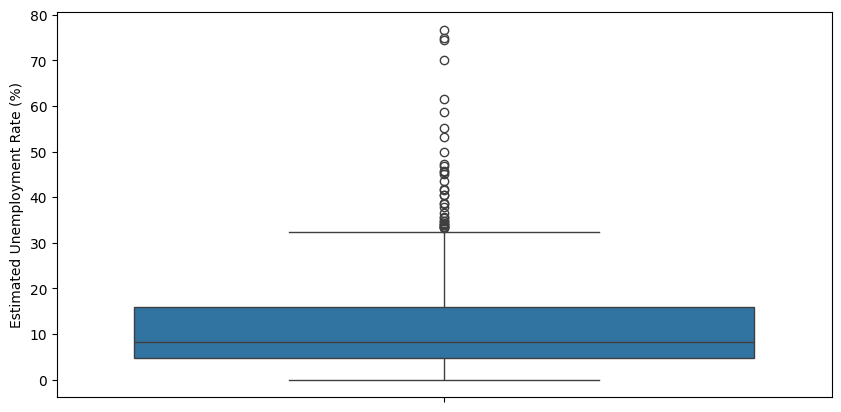

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
sns.boxplot(y=df['Estimated Unemployment Rate (%)'])

In [ ]:
Q1 = df['Estimated Unemployment Rate (%)'].quantile(0.25)
Q3 = df['Estimated Unemployment Rate (%)'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter outliers
outliers = df[(df['Estimated Unemployment Rate (%)'] > upper_bound) |
              (df['Estimated Unemployment Rate (%)'] < lower_bound)]

print(outliers[['Region', 'Date', 'Estimated Unemployment Rate (%)']])


               Region         Date       Date  Estimated Unemployment Rate (%)
37              Bihar   30-04-2020 2020-04-30                            45.09
38              Bihar   31-05-2020 2020-05-31                            47.26
105           Haryana   30-04-2020 2020-04-30                            41.61
106           Haryana   31-05-2020 2020-05-31                            34.22
107           Haryana   30-06-2020 2020-06-30                            35.57
144         Jharkhand   30-04-2020 2020-04-30                            41.72
145         Jharkhand   31-05-2020 2020-05-31                            55.10
158         Karnataka   30-04-2020 2020-04-30                            33.17
242        Puducherry   30-04-2020 2020-04-30                            74.51
255            Punjab   31-05-2020 2020-05-31                            40.59
287        Tamil Nadu   30-04-2020 2020-04-30                            53.19
288        Tamil Nadu   31-05-2020 2020-05-31       

In [ ]:
df_no_outliers = df[
    (df['Estimated Unemployment Rate (%)'] >= lower_bound) &
    (df['Estimated Unemployment Rate (%)'] <= upper_bound)]
df_no_outliers.to_csv('unemployment_NoOutliers.csv', index=False)